In [2]:
import numpy as np
import time
import qiskit.quantum_info as qi
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import DensityMatrix

from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.visualization import *
# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9', overwrite=True)
provider = IBMQ.load_account()

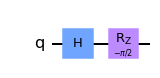

In [3]:
# One qubit density matrix
bell = QuantumCircuit(1)
bell.h(0)
bell.rz(-np.pi/2,0)

bell.draw(output='mpl');

In [4]:
stateB = qi.Statevector.from_instruction(bell)
stateB.draw('latex')

<IPython.core.display.Latex object>

D:\BarIlan\Qiskit\lib\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


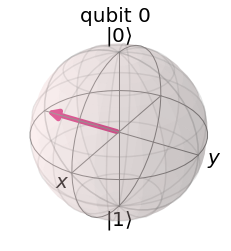

In [5]:
plot_bloch_multivector(stateB);

D:\BarIlan\Qiskit\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
D:\BarIlan\Qiskit\lib\site-packages\qiskit\circuit\quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
D:\BarIlan\Qiskit\lib\site-packages\qiskit\ignis\verification\tomography\basis\circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep + meas
D:\BarIlan\Qiskit\lib\site-packages\qiskit\circuit\quantumcir

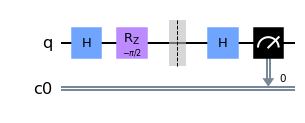

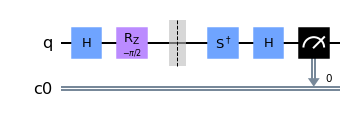

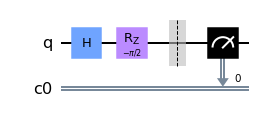

In [6]:
# Generate the state tomography circuits.
qst_bell = state_tomography_circuits(bell, bell.qubits)
drawings = []
for i in range(len(qst_bell)):
    drawings.append(qst_bell[i].draw(output = 'mpl'))

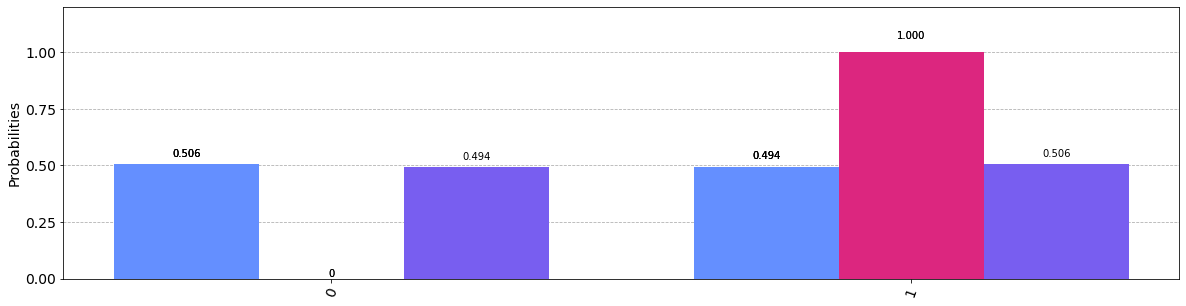

In [7]:
# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)
output = plot_histogram(job.result().get_counts(), figsize = (20,5))
# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)

In [8]:
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, stateB)
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.99993


In [9]:
matrix = DensityMatrix(rho_fit_bell)
matrix.draw('latex')

<IPython.core.display.Latex object>

In [10]:
from qiskit.quantum_info.states.utils import _format_state

p = _format_state(stateB).data
rho = matrix.data

fidelity = p.conj().dot(rho.dot(p))

print(fidelity)
print(matrix.purity())

(0.9999254166913296-2.7755575615628914e-17j)
(1.0000000000000004+0j)
